Goal

The objective of this assignment is to introduce students to search algorithms,
particularly linear search and binary search, within the context of data sci-
ence algorithms. By completing this assignment, students will not only gain
familiarity with these algorithms but also understand their relevance and
application in data science tasks.

Instructions
1. Function Implementation
    • Write a Python class named SearchAlgorithms that contains the following methods:
        – generate array(size): Generates an array of the specified size
          (size) containing random integers.
        – linear search(array, target): Implements linear search algo-
          rithm to find the index of the target integer in the array.
          If the target is not found, return -1.
        – binary search(array, target): Implements binary search al-
          gorithm to find the index of the target integer in the sorted array.
          If the target is not found, return -1.

2. Simulation
    • In your main program:
        – Instantiate an object of the SearchAlgorithms class.
        – Generate an array of size n (input provided by the user) using the
          generate array method.
        – Randomly select an integer from the generated array.
        – Apply both linear search and binary search algorithms to find the
          selected integer using the corresponding methods.
        – Record the time taken by each algorithm to complete the search
          operation using the time module.

3. Testing and Analysis
    • Compare the efficiency of linear search and binary search algorithms based on:
        – Time complexity.
        – Space complexity.
        – Performance on arrays of different sizes.
        – Performance on sorted vs unsorted arrays.
        – Discuss the advantages and disadvantages of each algorithm within
          the context of data science tasks.

4. Submission Requirements
    • Submit your Python code along with a comprehensive report discussing
      your implementation, simulation results, and analysis of the search
      algorithms’ efficiency within the context of data science.
    • Place your analysis and testing results in the report. When does binary
      over take linear?
    • Include any additional insights or observations gained during the com-
      pletion of this assignment.

In [4]:
import random
random.seed()

In [5]:
class SearchAlgorithms:

    def generate_array(self, size):
        return [random.randint(0,99999) for _ in range(size)]

    def linear_search(self, array, target):
        for index, value in enumerate(array):
            if value == target:
                return index
        return -1

    def binary_search(self, array, target):
        left = 0
        right = len(array) - 1
        
        while left <= right:
            mid = left + (right - left)//2
            
            if array[mid] == target:
                return mid
            elif array[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        
        return -1

    def count_sort(self, input_array):
        M = max(array)

        count_array = [0] * (M + 1)
        for num in input_array:
            count_array[num] += 1

        for i in range(1, M + 1):
            count_array[i] += count_array[i - 1]

        output_array = [0] * len(input_array)
        for i in range(len(input_array) - 1, -1, -1):
            output_array[count_array[input_array[i]] - 1] = input_array[i]
            count_array[input_array[i]] -= 1

        return output_array

In [6]:
import time

search_algo = SearchAlgorithms()
size = 10000
array = search_algo.generate_array(size)
target = random.choice(array)

start_time = time.time()
linear_index = search_algo.linear_search(array, target)
end_time = time.time()
linear_execution_time = end_time - start_time
print("Execution time for linear search is ", linear_execution_time, "seconds.")

start_time = time.time()
sorted_array = search_algo.count_sort(array)
binary_index = search_algo.binary_search(sorted_array, target)
end_time = time.time()
binary_execution_time = end_time - start_time
print("Execution time for binary search is ", binary_execution_time, "seconds.")

Execution time for linear search is  0.0019991397857666016 seconds.
Execution time for binary search is  0.0457918643951416 seconds.


In [30]:
def measure_execution_time_for_searches_linear(search_algo, array, num_searches):
    start_time = time.time()
    for _ in range(num_searches):
        target = random.choice(array)
        index_linear = search_algo.linear_search(array, target) 
    end_time = time.time()
    return end_time - start_time

def measure_execution_time_for_searches_binary(search_algo, array, num_searches):
    start_time = time.time()
    sorted_array = search_algo.count_sort(array)
    for _ in range(num_searches):
        target = random.choice(sorted_array)
        index_binary = search_algo.binary_search(sorted_array, target)
    end_time = time.time()
    return end_time - start_time

In [31]:
size = 10000
array = search_algo.generate_array(size)
num_searches_list = range(1, 10001, 50)
execution_times_linear = []
execution_times_binary = []

for num_searches in num_searches_list:
    execution_times_linear.append(measure_execution_time_for_searches_linear(search_algo, array, num_searches))
    execution_times_binary.append(measure_execution_time_for_searches_binary(search_algo, sorted_array, num_searches))

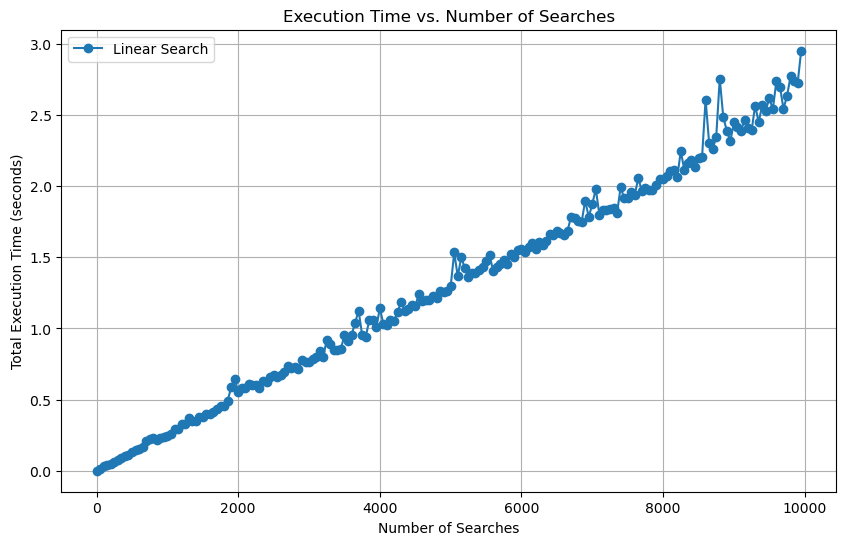

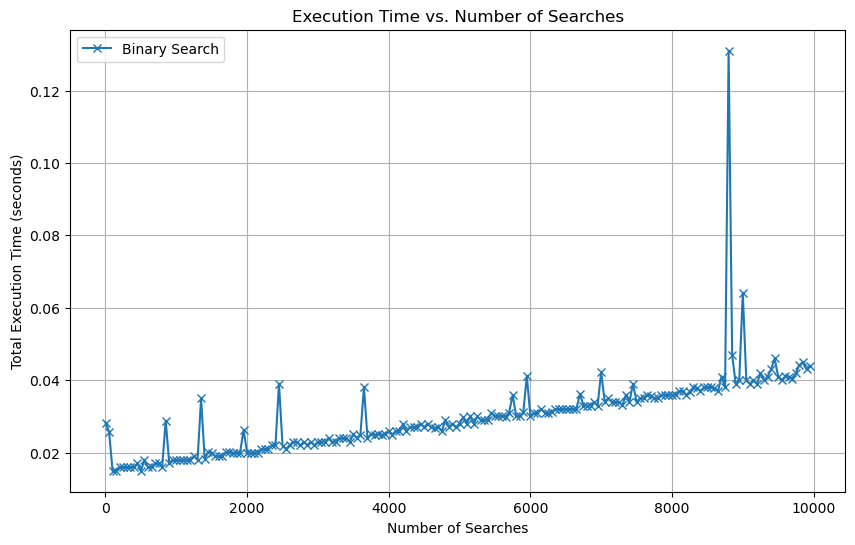

In [32]:
import matplotlib.pyplot as plt

## Execution Time vs. Number of Searches

plt.figure(figsize=(10, 6))
plt.plot(num_searches_list, execution_times_linear, label='Linear Search', marker='o')
plt.xlabel('Number of Searches')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Execution Time vs. Number of Searches')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(num_searches_list, execution_times_binary, label='Binary Search', marker='x')
plt.xlabel('Number of Searches')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Execution Time vs. Number of Searches')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
## Sorted Arrays

# Set sizes to be tested and amount of times each should be tested to be averaged over
sizes = range(1, 320001, 50000)
num_arrays = 1000
linear_times_sorted = []
binary_times_sorted = []

# Test for each size
for size in sizes:
    total_linear_time = 0
    total_binary_time = 0

    # Test 1000 times for more consistent results
    for _ in range(num_arrays):
        array = search_algo.generate_array(size)
        sorted_array = search_algo.count_sort(array)
        target = random.choice(sorted_array)

        # Linear Search
        start_time = time.time()
        linear_index = search_algo.linear_search(sorted_array, target)
        end_time = time.time()
        total_linear_time += (end_time - start_time)

        # Binary Search without Sorting
        start_time = time.time()
        binary_index = search_algo.binary_search(sorted_array, target)
        end_time = time.time()
        total_binary_time += (end_time - start_time)
    
    # Average the times
    linear_times_sorted.append(total_linear_time / num_arrays)
    binary_times_sorted.append(total_binary_time / num_arrays)


In [77]:
## Unsorted Arrays

linear_times_unsorted = []
binary_times_unsorted = []

# Test for each size
for size in sizes:
    total_linear_time = 0
    total_binary_time = 0

    # Test 1000 times for more consistent results
    for _ in range(num_arrays):
        array = search_algo.generate_array(size)
        target = random.choice(array)

        # Linear Search
        start_time = time.time()
        linear_index = search_algo.linear_search(array, target)
        end_time = time.time()
        total_linear_time += (end_time - start_time)

        # Binary Search with Sorting
        start_time = time.time()
        sorted_array = search_algo.count_sort(array)
        binary_index = search_algo.binary_search(sorted_array, target)
        end_time = time.time()
        total_binary_time += (end_time - start_time)
    
    # Average the times
    linear_times_unsorted.append(total_linear_time / num_arrays)
    binary_times_unsorted.append(total_binary_time / num_arrays)

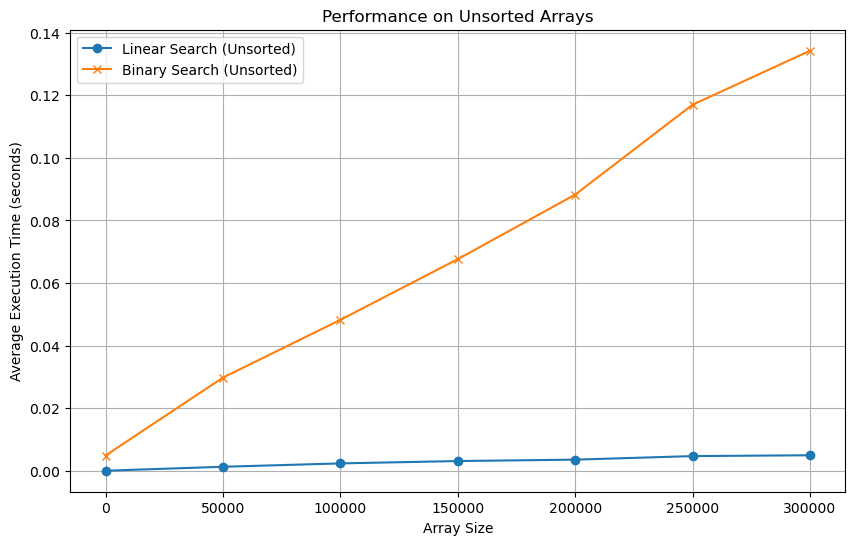

In [87]:
## Performance on Unsorted Arrays
plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times_unsorted, label='Linear Search (Unsorted)', marker='o')
plt.plot(sizes, binary_times_unsorted, label='Binary Search (Unsorted)', marker='x')
plt.xlabel('Array Size')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance on Unsorted Arrays')
plt.legend()
plt.grid(True)
plt.show()

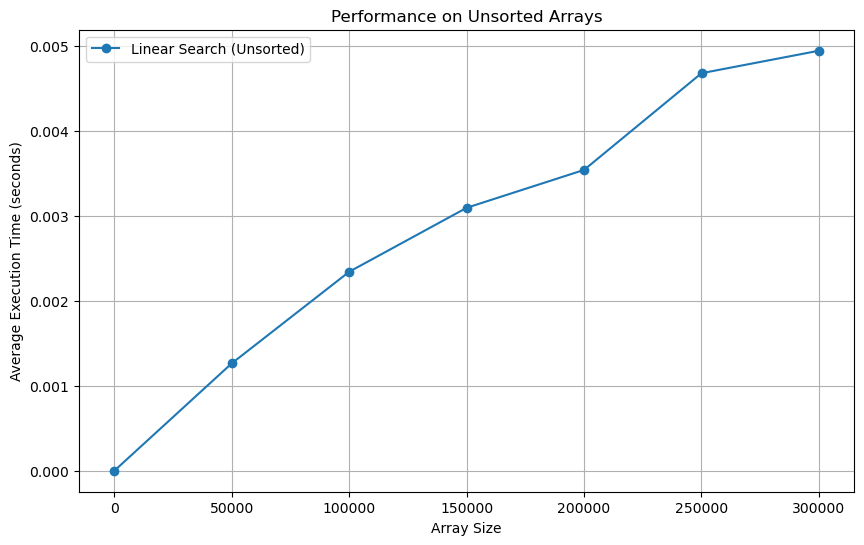

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times_unsorted, label='Linear Search (Unsorted)', marker='o')
plt.xlabel('Array Size')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance on Unsorted Arrays')
plt.legend()
plt.grid(True)
plt.show()

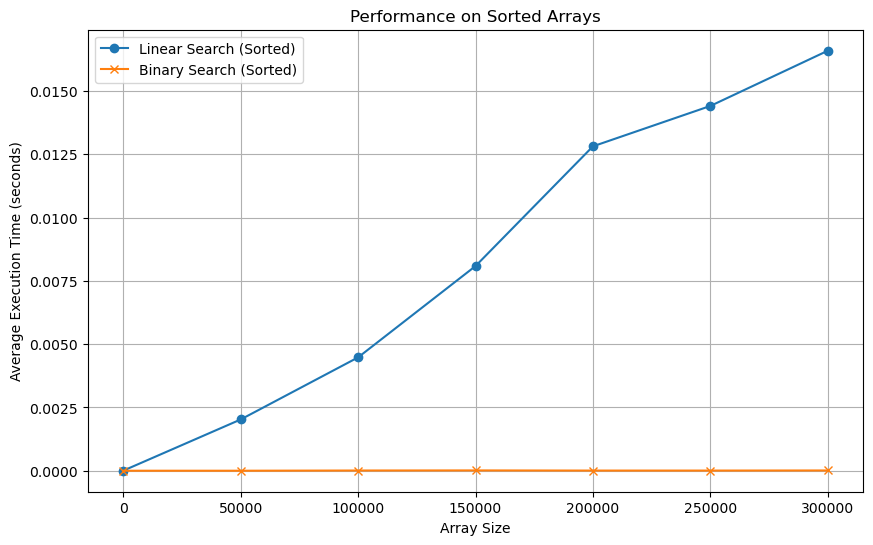

In [89]:
## Performance on Sorted Arrays
plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times_sorted, label='Linear Search (Sorted)', marker='o')
plt.plot(sizes, binary_times_sorted, label='Binary Search (Sorted)', marker='x')
plt.xlabel('Array Size')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance on Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()

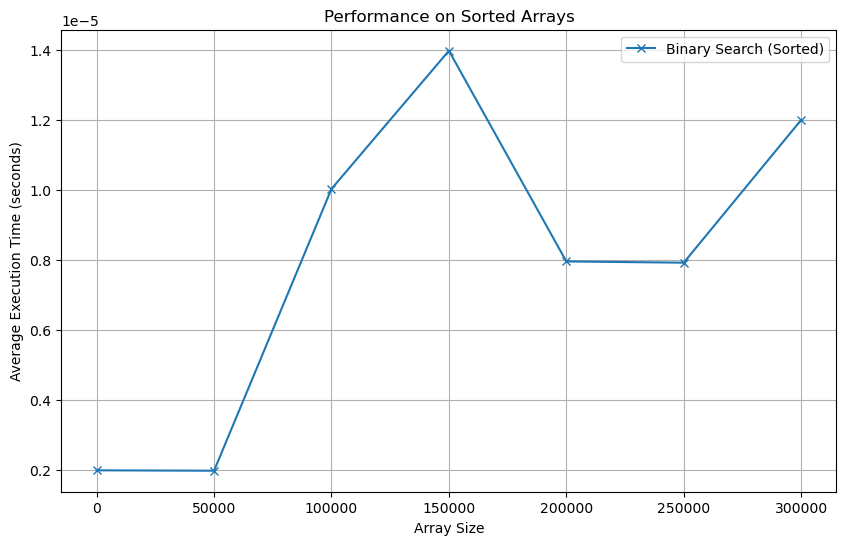

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, binary_times_sorted, label='Binary Search (Sorted)', marker='x')
plt.xlabel('Array Size')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance on Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()